In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv("StudentsPerformance.csv")
             


print(df.head())

print(df.describe())

print(df['gender'].value_counts())

print(df['race/ethnicity'].value_counts())

print(df['parental level of education'].value_counts())

print(df[['math score', 'reading score', 'writing score']].corr())

    
   
   
   

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

In [7]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with the mean
df['math score'].fillna(df['math score'].mean(), inplace=True)
df['reading score'].fillna(df['reading score'].mean(), inplace=True)
df['writing score'].fillna(df['writing score'].mean(), inplace=True)

# Fill missing categorical values with the mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['lunch'].fillna(df['lunch'].mode()[0], inplace=True)

# Handle outliers (optional: for scores below 0 or above 100)
for col in ['math score', 'reading score', 'writing score']:
    df = df[(df[col] >= 0) & (df[col] <= 100)]

# Verify cleaned data
print(df.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13244\1964752914.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13244\1964752914.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

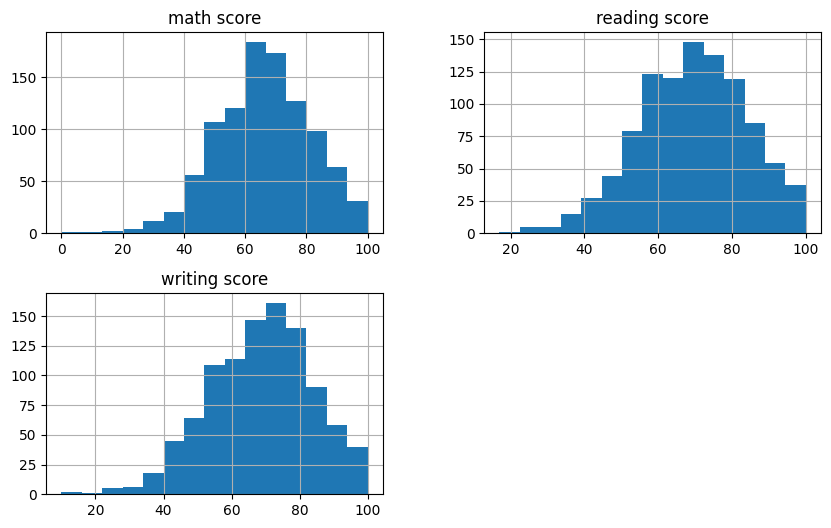

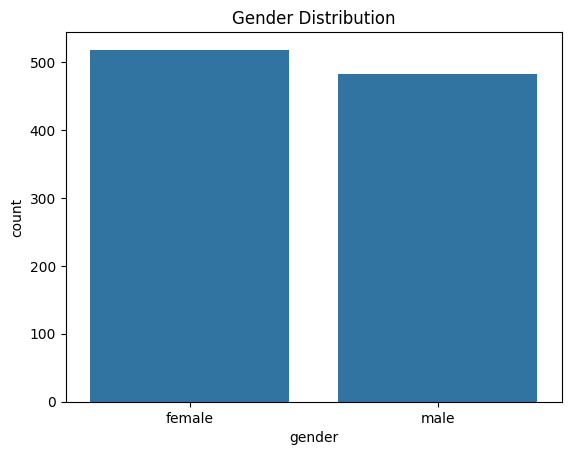

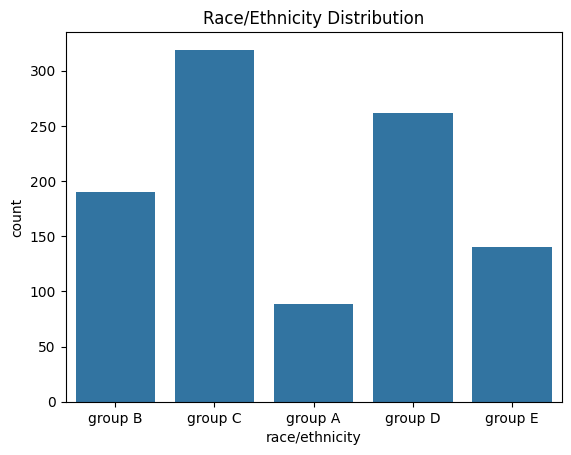

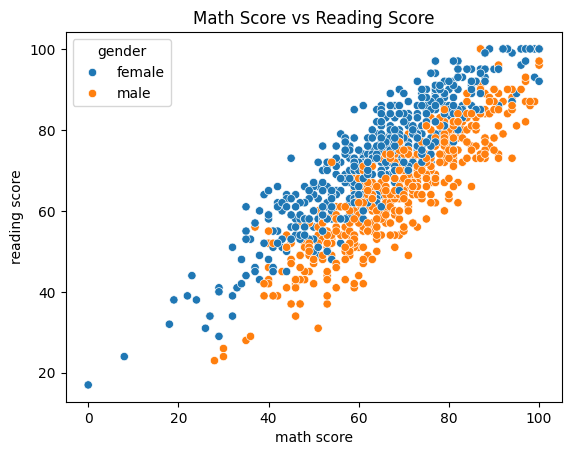

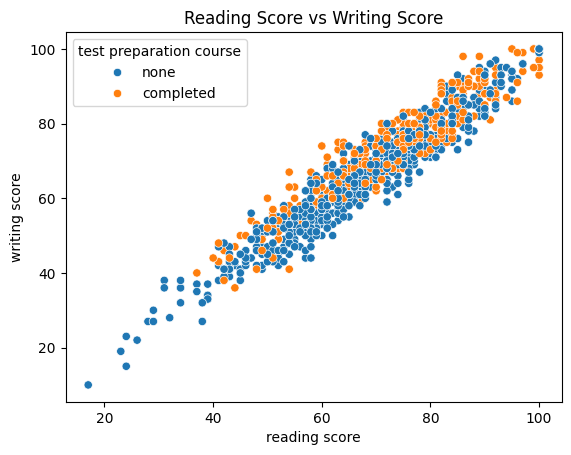

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of scores
df[['math score', 'reading score', 'writing score']].hist(bins=15, figsize=(10, 6))
plt.show()

# Bar plot for categorical variables
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x='race/ethnicity', data=df)
plt.title("Race/Ethnicity Distribution")
plt.show()

# Scatterplot to show relationships between scores
sns.scatterplot(x='math score', y='reading score', hue='gender', data=df)
plt.title("Math Score vs Reading Score")
plt.show()

sns.scatterplot(x='reading score', y='writing score', hue='test preparation course', data=df)
plt.title("Reading Score vs Writing Score")
plt.show()


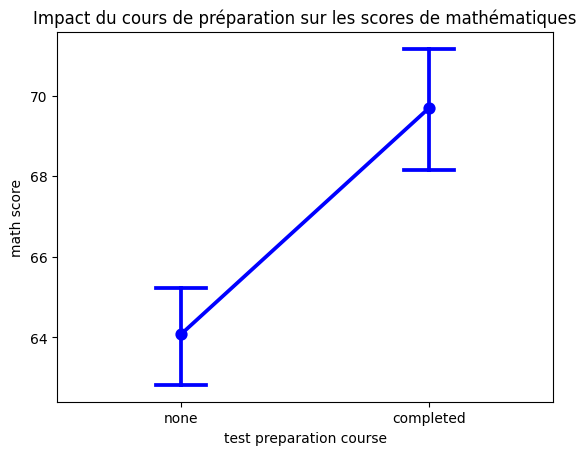

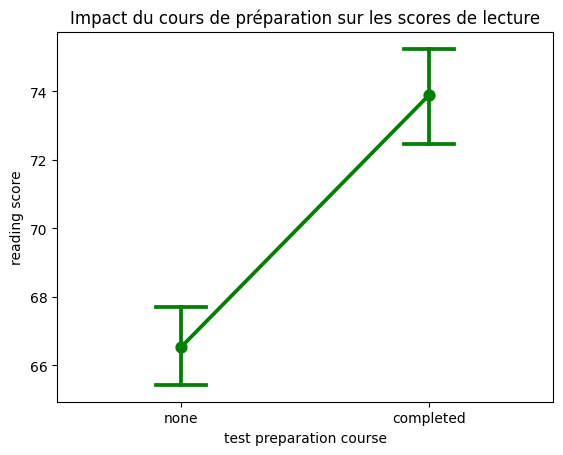

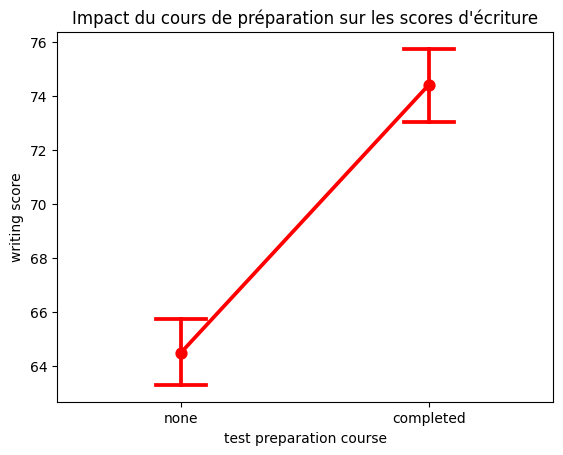

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("StudentsPerformance.csv")
# Boxplot des scores en fonction du cours de préparation
# Point plot for math scores
sns.pointplot(x='test preparation course', y='math score', data=df, capsize=0.2, color='blue')
plt.title("Impact du cours de préparation sur les scores de mathématiques")
plt.show()

# Point plot for reading scores
sns.pointplot(x='test preparation course', y='reading score', data=df, capsize=0.2, color='green')
plt.title("Impact du cours de préparation sur les scores de lecture")
plt.show()

# Point plot for writing scores
sns.pointplot(x='test preparation course', y='writing score', data=df, capsize=0.2, color='red')
plt.title("Impact du cours de préparation sur les scores d'écriture")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Features and target variable
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Feature importance (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


Mean Squared Error: 29.095169866715494
R^2 Score: 0.8804332983749564
                                          Feature  Coefficient
2                                     gender_male    13.064884
6                          race/ethnicity_group E     4.892649
12                                 lunch_standard     3.510075
13                   test preparation course_none     3.289642
10       parental level of education_some college     0.998856
8         parental level of education_high school     0.929312
11   parental level of education_some high school     0.756470
1                                   writing score     0.724148
3                          race/ethnicity_group B     0.359323
0                                   reading score     0.236023
5                          race/ethnicity_group D    -0.613236
4                          race/ethnicity_group C    -0.625617
7   parental level of education_bachelor's degree    -0.716901
9     parental level of education_master's degree

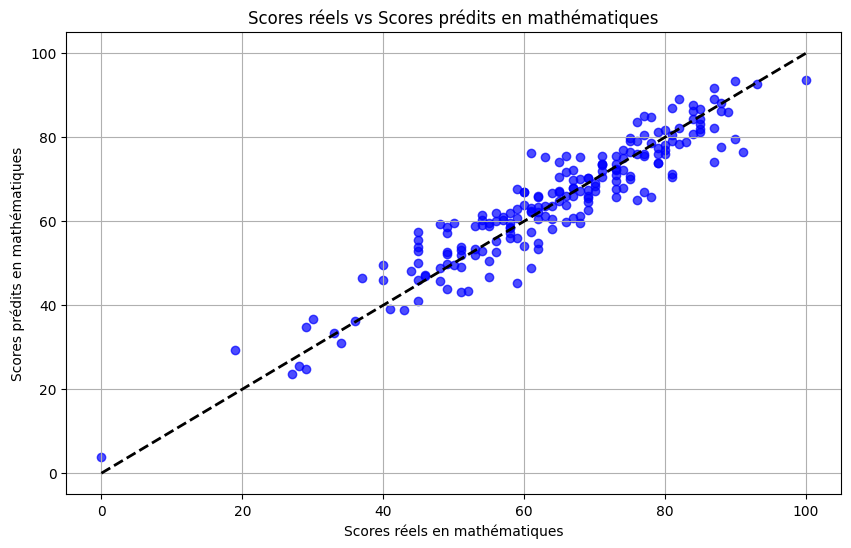

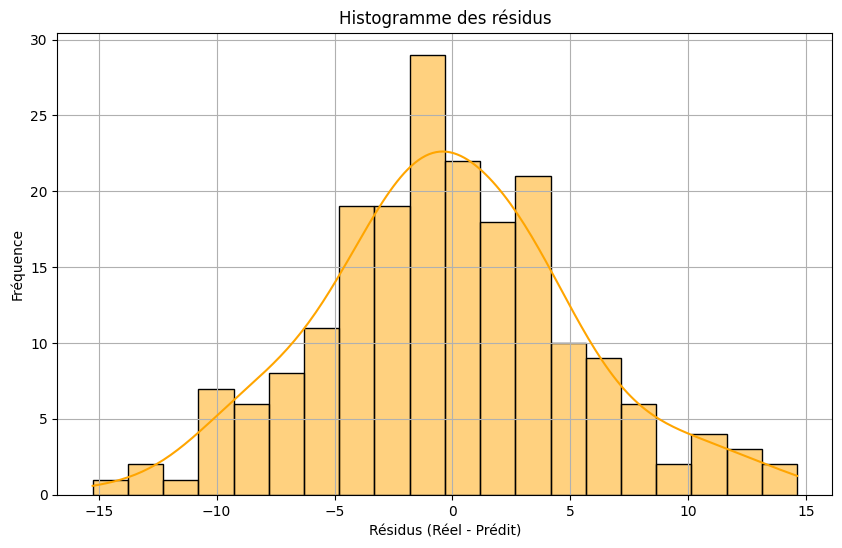

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13244\206593388.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='viridis')


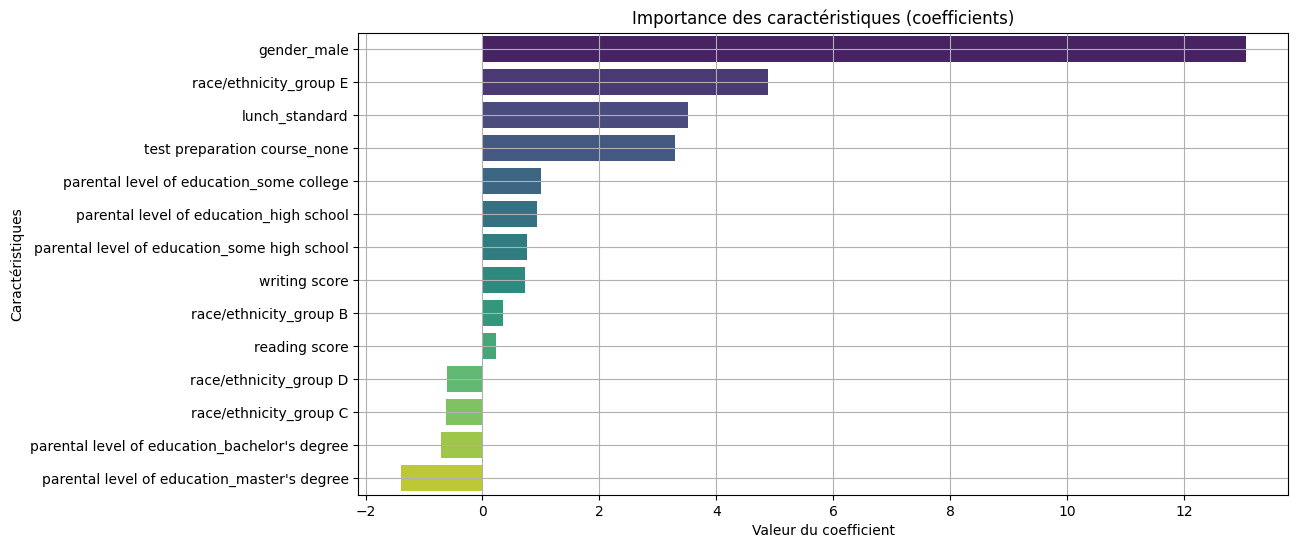

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Graphique de dispersion : Scores réels vs Prédits en mathématiques
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ligne des prédictions parfaites
plt.title('Scores réels vs Scores prédits en mathématiques')
plt.xlabel('Scores réels en mathématiques')
plt.ylabel('Scores prédits en mathématiques')
plt.grid(True)
plt.show()

# 2. Histogramme des résidus (erreurs)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title('Histogramme des résidus')
plt.xlabel('Résidus (Réel - Prédit)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# 3. Diagramme en barres de l'importance des caractéristiques (coefficients)
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_sorted, palette='viridis')
plt.title('Importance des caractéristiques (coefficients)')
plt.xlabel('Valeur du coefficient')
plt.ylabel('Caractéristiques')
plt.grid(True)
plt.show()



In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def load_data(file_path):
    """Charge les données depuis le fichier CSV"""
    try:
        df = pd.read_csv(file_path)
        print("Données chargées avec succès !")
        return df
    except Exception as e:
        print(f"Erreur lors du chargement des données: {e}")
        return None

def preprocess_data(df):
    """Prétraite les données"""
    # Encodage des colonnes catégorielles
    encoders = {}
    categorical_columns = [
        'gender', 'race/ethnicity', 'parental level of education',
        'lunch', 'test preparation course'
    ]
    for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        encoders[column] = le
    
    # Normalisation des colonnes de score
    scaler = StandardScaler()
    score_columns = ['math score', 'reading score', 'writing score']
    df[score_columns] = scaler.fit_transform(df[score_columns])
    
    return df, encoders, scaler

def create_linear_model(input_dim):
    """Crée un modèle de régression linéaire avec TensorFlow"""
    model = Sequential([
        Dense(1, activation='linear', input_dim=input_dim)  # 1 seule couche pour une régression linéaire
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

def train_model(X_train, y_train):
    """Entraîne le modèle de régression linéaire"""
    model = create_linear_model(X_train.shape[1])
    
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ]
    
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    
    return model, history

def evaluate_model(model, X_test, y_test):
    """Évalue le modèle sur les données de test"""
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, rmse

def plot_learning_curve(history, output_file='learning_curve.png'):
    """Affiche la courbe d'apprentissage"""
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Loss (entraînement)', color='blue')
    plt.plot(history.history['val_loss'], label='Loss (validation)', color='red')
    plt.title('Courbe d\'apprentissage')
    plt.xlabel('Époques')
    plt.ylabel('Erreur (MSE)')
    plt.legend()
    plt.grid(True)
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()

def plot_feature_importance(model, feature_names, output_file='feature_importance.png'):
    """Affiche l'importance des caractéristiques basée sur les poids du modèle"""
    weights = model.layers[0].get_weights()[0].flatten()
    importance = dict(zip(feature_names, weights))
    importance = dict(sorted(importance.items(), key=lambda x: abs(x[1]), reverse=True))
    
    plt.figure(figsize=(10, 8))
    plt.barh(list(importance.keys()), list(importance.values()), color='skyblue')
    plt.title('Importance des caractéristiques (Poids du modèle)', pad=20)
    plt.xlabel('Poids')
    plt.ylabel('Caractéristiques')
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()
    print("\nVisualisation des poids sauvegardée dans:", output_file)

def main(file_path):
    """Pipeline principal"""
    # 1. Chargement des données
    print("Chargement des données...")
    df = load_data(file_path)
    if df is None:
        return

    # 2. Prétraitement
    print("Prétraitement des données...")
    df_processed, encoders, scaler = preprocess_data(df)
    
    # 3. Séparation des données
    X = df_processed.drop('math score', axis=1)
    y = df_processed['math score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 4. Entraînement
    print("Entraînement du modèle...")
    model, history = train_model(X_train, y_train)
    
    # 5. Évaluation
    print("Évaluation des performances...")
    r2, rmse = evaluate_model(model, X_test, y_test)
    
    # 6. Visualisations
    print("\nCréation des visualisations...")
    plot_learning_curve(history)
    plot_feature_importance(model, X.columns)
    
    # 7. Résultats
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    return model, history

# Exécution du script
if __name__ == "__main__":
    model, history = main("StudentsPerformance.csv")



Chargement des données...
Données chargées avec succès !
Prétraitement des données...
Entraînement du modèle...
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.0072 - mae: 1.8965 - val_loss: 1.8186 - val_mae: 1.0992
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1838 - mae: 0.8711 - val_loss: 0.7057 - val_mae: 0.6960
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6698 - mae: 0.6765 - val_loss: 0.6273 - val_mae: 0.6517
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.6120 - mae: 0.6314 - val_loss: 0.5643 - val_mae: 0.6186
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.5350 - mae: 0.5872 - val_loss: 0.5047 - val_mae: 0.5833
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.5403 - mae: 0.5972 - val_loss: 0.4455 - val_mae: 0.5449
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4182 - mae: 0.5196 - val_loss: 0.3976 - val_mae: 0.5108
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.

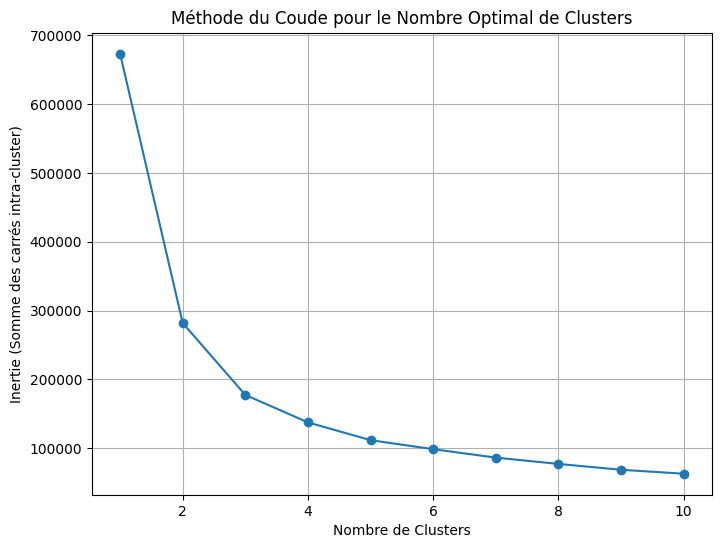

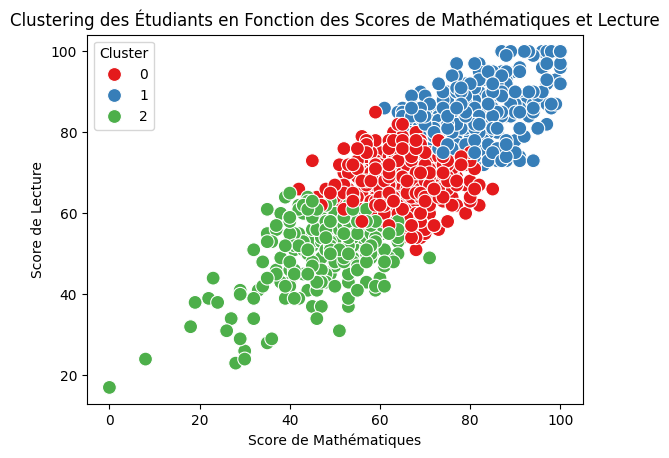

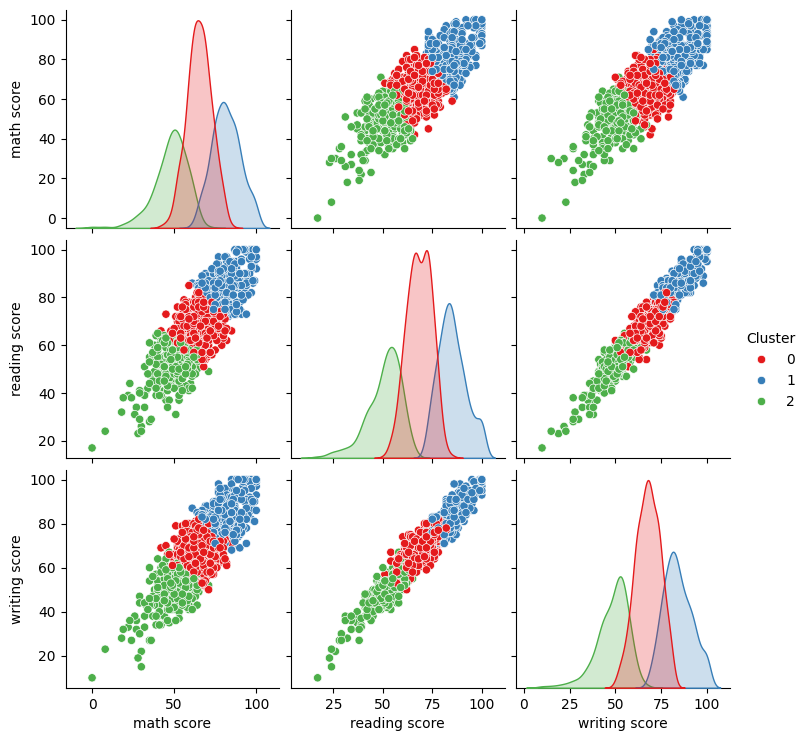

Centres des Clusters (Centroides de chaque cluster) :
   math score  reading score  writing score
0   65.197727      68.327273      67.695455
1   81.661342      84.980831      84.025559
2   47.943320      50.631579      48.453441

Scores Moyens par Cluster :
         math score  reading score  writing score
Cluster                                          
0         65.197727      68.327273      67.695455
1         81.661342      84.980831      84.025559
2         47.943320      50.631579      48.453441


In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sélectionner les colonnes des scores pour le clustering
# Ici, nous utilisons les scores de mathématiques, lecture et écriture
scores = df[['math score', 'reading score', 'writing score']]

# Déterminer le nombre optimal de clusters en utilisant la méthode du coude (elbow method)
inertia = []  # Liste pour stocker l'inertie pour chaque nombre de clusters

# Boucle pour calculer l'inertie pour différentes valeurs de k (nombre de clusters)
for k in range(1, 11):  # Nous testons de 1 à 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)  # Créer un modèle K-Means
    kmeans.fit(scores)  # Entraîner le modèle avec les scores
    inertia.append(kmeans.inertia_)  # Stocker l'inertie (somme des carrés intra-cluster)

# Tracer la courbe du coude pour visualiser le nombre optimal de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode du Coude pour le Nombre Optimal de Clusters")
plt.xlabel("Nombre de Clusters")
plt.ylabel("Inertie (Somme des carrés intra-cluster)")
plt.grid(True)
plt.show()

# En observant le graphique, on choisit le nombre optimal de clusters (par exemple, k=3)
optimal_k = 3  # Ce nombre peut être ajusté en fonction de la courbe du coude

# Entraîner K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scores)  # Assigner un cluster à chaque étudiant

# Visualiser les clusters sur un graphique de dispersion (math vs lecture)
sns.scatterplot(x='math score', y='reading score', hue='Cluster', data=df, palette='Set1', s=100, marker='o')
plt.title("Clustering des Étudiants en Fonction des Scores de Mathématiques et Lecture")
plt.xlabel("Score de Mathématiques")
plt.ylabel("Score de Lecture")
plt.legend(title="Cluster", loc='upper left')
plt.show()

# Visualiser les clusters en tenant compte des trois scores à l'aide d'un pairplot
sns.pairplot(df, vars=['math score', 'reading score', 'writing score'], hue='Cluster', palette='Set1')
plt.show()

# Analyser les centres des clusters (les centroides de chaque cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['math score', 'reading score', 'writing score'])
print("Centres des Clusters (Centroides de chaque cluster) :")
print(cluster_centers)

# Calculer les moyennes des scores pour chaque cluster
cluster_means = df.groupby('Cluster')[['math score', 'reading score', 'writing score']].mean()
print("\nScores Moyens par Cluster :")
print(cluster_means)


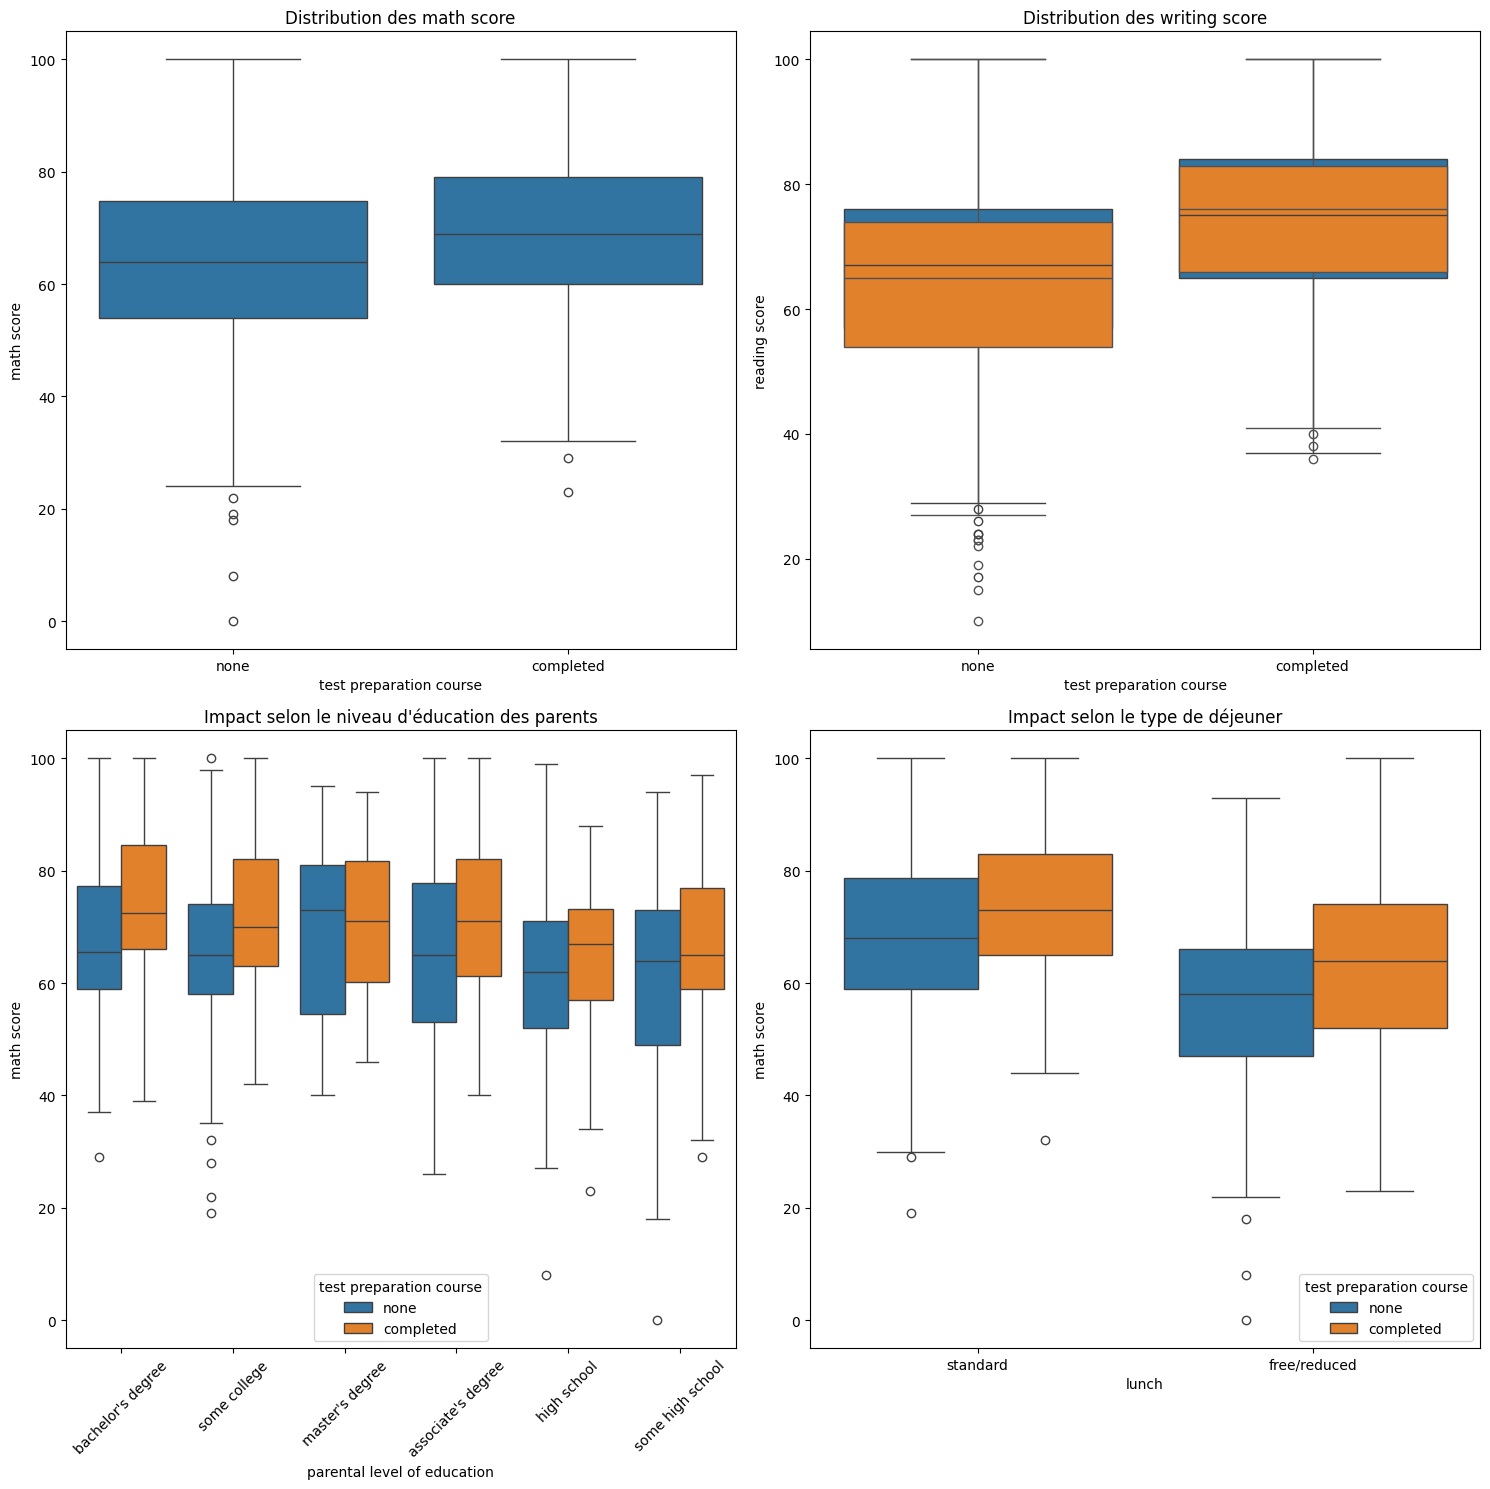

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

class AnalysePreparationTest:
    def __init__(self):
        self.label_encoders = {}
        
    def preprocesser_donnees(self, df):
        """Prétraitement des données avec encodage des variables catégorielles"""
        df_processed = df.copy()
        
        # Variables catégorielles à encoder
        categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 
                             'lunch', 'test preparation course']
        
        # Encodage de chaque variable catégorielle
        for column in categorical_columns:
            self.label_encoders[column] = LabelEncoder()
            df_processed[column] = self.label_encoders[column].fit_transform(df[column])
            
        return df_processed
        
    def analyser_scores(self, df):
        """Analyse détaillée des scores selon le cours de préparation"""
        resultats = {}
        
        # Analyse pour chaque type de score
        for score_type in ['math score', 'reading score', 'writing score']:
            # Statistiques descriptives par groupe
            stats_prep = df[df['test preparation course'] == 'completed'][score_type].describe()
            stats_non_prep = df[df['test preparation course'] == 'none'][score_type].describe()
            
            # Test statistique
            t_stat, p_value = stats.ttest_ind(
                df[df['test preparation course'] == 'completed'][score_type],
                df[df['test preparation course'] == 'none'][score_type]
            )
            
            resultats[score_type] = {
                'statistiques_avec_prep': stats_prep.to_dict(),
                'statistiques_sans_prep': stats_non_prep.to_dict(),
                'difference_moyenne': float(stats_prep['mean'] - stats_non_prep['mean']),
                'p_value': float(p_value)
            }
            
        return resultats
    
    def modeliser_impact(self, df):
        """Modélisation de l'impact avec Random Forest"""
        df_processed = self.preprocesser_donnees(df)
        resultats_modeles = {}
        
        # Variables explicatives
        features = ['gender', 'race/ethnicity', 'parental level of education', 
                   'lunch', 'test preparation course']
        X = df_processed[features]
        
        for score_type in ['math score', 'reading score', 'writing score']:
            y = df_processed[score_type]
            
            # Split des données
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Entraînement du modèle
            rf = RandomForestRegressor(n_estimators=100, random_state=42)
            rf.fit(X_train, y_train)
            
            # Prédictions et métriques
            predictions = rf.predict(X_test)
            r2 = r2_score(y_test, predictions)
            
            # Importance des variables
            feature_importance = dict(zip(features, rf.feature_importances_))
            
            resultats_modeles[score_type] = {
                'r2_score': float(r2),
                'importance_variables': feature_importance
            }
            
        return resultats_modeles
    
    def visualiser_resultats(self, df):
        """Création des visualisations"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 15))
        
        # Distribution des scores selon la préparation
        for i, score in enumerate(['math score', 'reading score', 'writing score']):
            sns.boxplot(x='test preparation course', y=score, data=df, ax=axes[0, 0 if i == 0 else 1])
            axes[0, 0 if i == 0 else 1].set_title(f'Distribution des {score}')
            
        # Interaction avec le niveau d'éducation des parents
        sns.boxplot(x='parental level of education', y='math score', 
                   hue='test preparation course', data=df, ax=axes[1, 0])
        axes[1, 0].set_title('Impact selon le niveau d\'éducation des parents')
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        # Interaction avec le type de déjeuner
        sns.boxplot(x='lunch', y='math score', 
                   hue='test preparation course', data=df, ax=axes[1, 1])
        axes[1, 1].set_title('Impact selon le type de déjeuner')
        
        plt.tight_layout()
        plt.show()
df = pd.read_csv("StudentsPerformance.csv")
# Exemple d'utilisation:
analyseur = AnalysePreparationTest()
resultats_stats = analyseur.analyser_scores(df)
resultats_modeles = analyseur.modeliser_impact(df)
analyseur.visualiser_resultats(df)

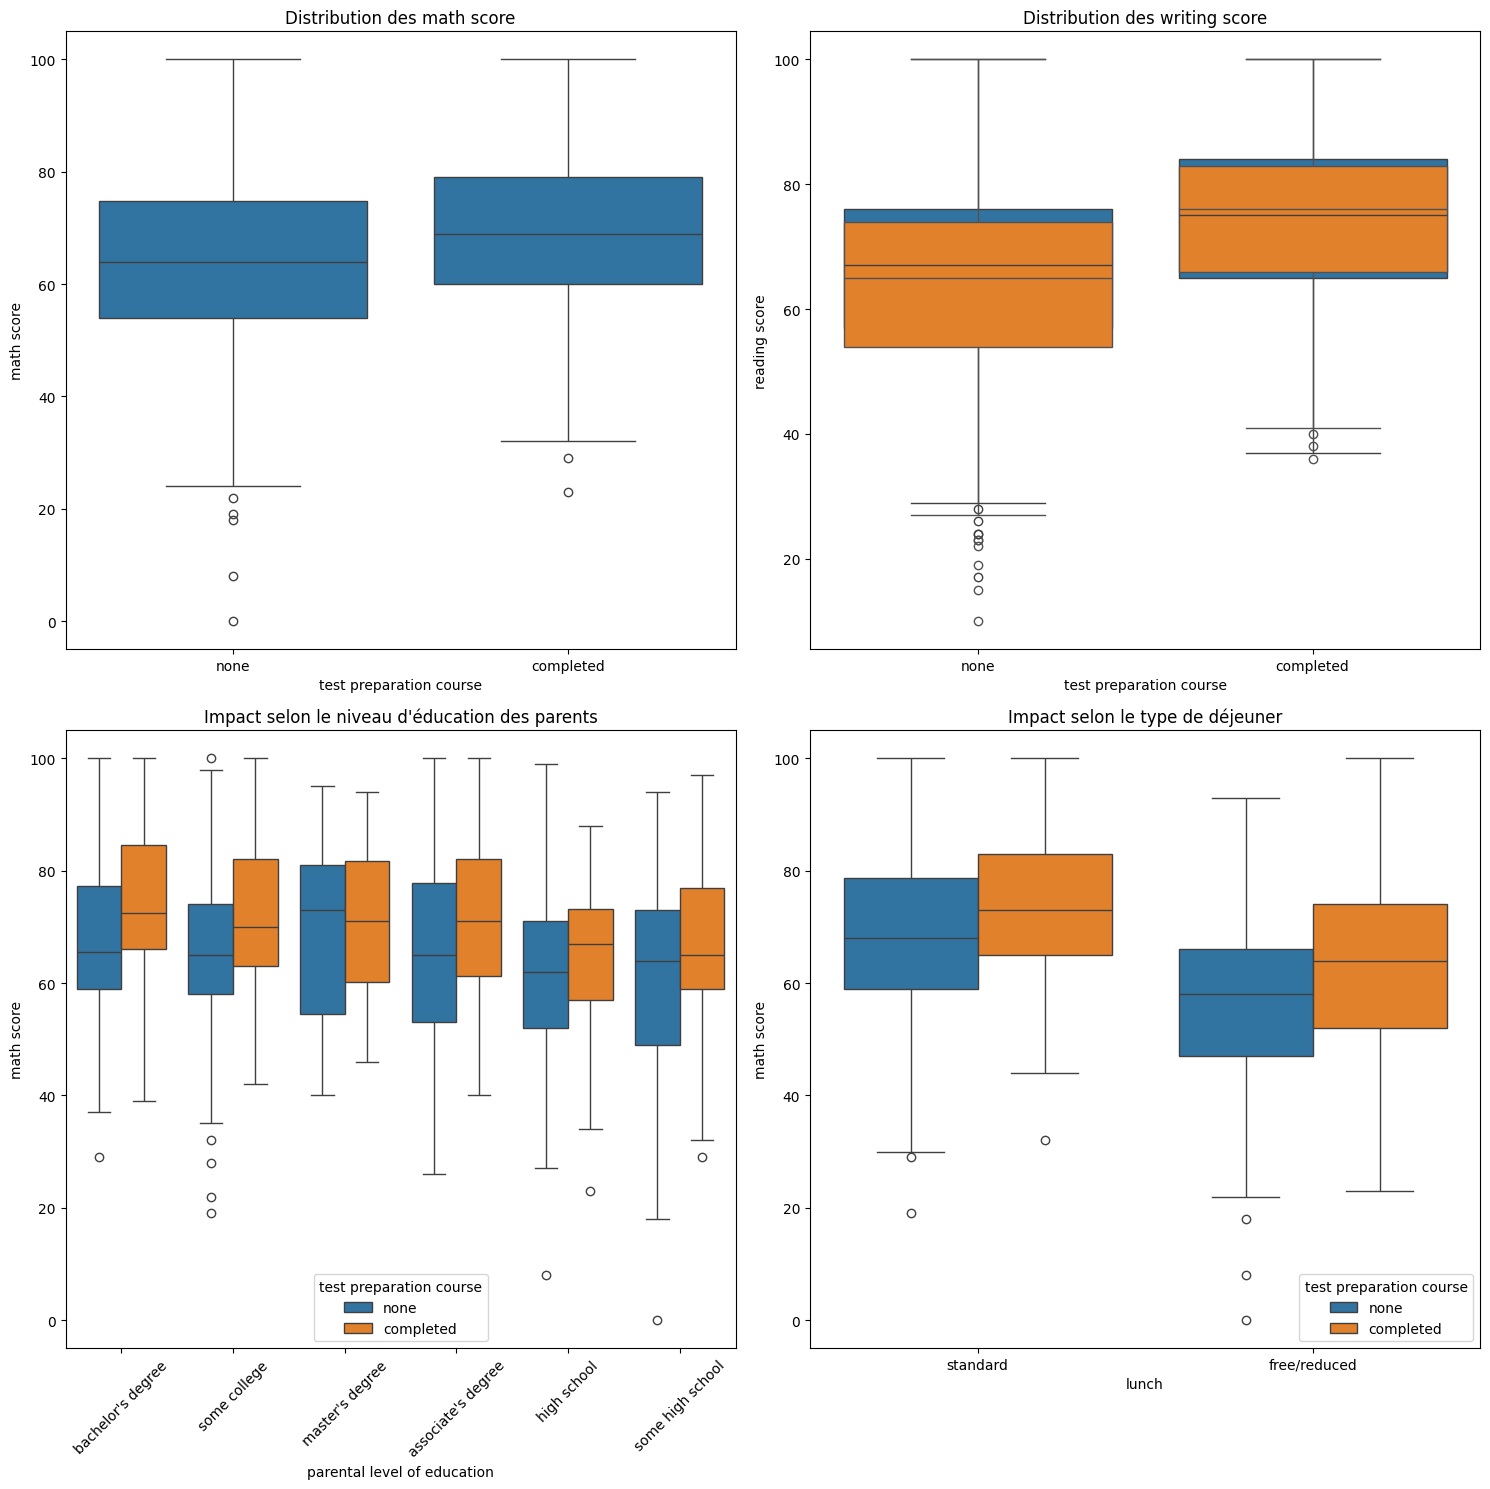

In [12]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Définition du Dataset personnalisé
class StudentDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Définition du modèle PyTorch
class ScorePredictor(nn.Module):
    def __init__(self, input_dim):
        super(ScorePredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

# Classe principale pour l'analyse
class AnalysePreparationTest:
    def __init__(self):
        self.label_encoders = {}
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    def preprocesser_donnees(self, df):
        """Prétraitement des données avec encodage des variables catégorielles"""
        df_processed = df.copy()
        
        # Variables catégorielles à encoder
        categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 
                               'lunch', 'test preparation course']
        
        # Encodage de chaque variable catégorielle
        for column in categorical_columns:
            self.label_encoders[column] = LabelEncoder()
            df_processed[column] = self.label_encoders[column].fit_transform(df[column])
            
        return df_processed
        
    def analyser_scores(self, df):
        """Analyse détaillée des scores selon le cours de préparation"""
        resultats = {}
        
        for score_type in ['math score', 'reading score', 'writing score']:
            stats_prep = df[df['test preparation course'] == 'completed'][score_type].describe()
            stats_non_prep = df[df['test preparation course'] == 'none'][score_type].describe()
            
            # Test statistique
            t_stat, p_value = stats.ttest_ind(
                df[df['test preparation course'] == 'completed'][score_type],
                df[df['test preparation course'] == 'none'][score_type]
            )
            
            resultats[score_type] = {
                'statistiques_avec_prep': stats_prep.to_dict(),
                'statistiques_sans_prep': stats_non_prep.to_dict(),
                'difference_moyenne': float(stats_prep['mean'] - stats_non_prep['mean']),
                'p_value': float(p_value)
            }
            
        return resultats
    
    def modeliser_impact(self, df):
        """Modélisation de l'impact avec PyTorch"""
        df_processed = self.preprocesser_donnees(df)
        resultats_modeles = {}
        
        features = ['gender', 'race/ethnicity', 'parental level of education', 
                    'lunch', 'test preparation course']
        X = df_processed[features].values
        
        for score_type in ['math score', 'reading score', 'writing score']:
            y = df_processed[score_type].values
            
            # Division des données
            train_size = int(0.8 * len(X))
            X_train, X_test = X[:train_size], X[train_size:]
            y_train, y_test = y[:train_size], y[train_size:]
            
            # Préparation des DataLoaders
            train_dataset = StudentDataset(X_train, y_train)
            test_dataset = StudentDataset(X_test, y_test)
            train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=32)
            
            # Initialisation du modèle
            model = ScorePredictor(input_dim=X.shape[1]).to(self.device)
            criterion = nn.MSELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
            
            # Entraînement
            for epoch in range(50):  # 50 époques
                model.train()
                for X_batch, y_batch in train_loader:
                    X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)
                    optimizer.zero_grad()
                    predictions = model(X_batch).squeeze()
                    loss = criterion(predictions, y_batch)
                    loss.backward()
                    optimizer.step()
            
            # Évaluation
            model.eval()
            all_predictions = []
            all_targets = []
            with torch.no_grad():
                for X_batch, y_batch in test_loader:
                    X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)
                    predictions = model(X_batch).squeeze()
                    all_predictions.append(predictions.cpu().numpy())
                    all_targets.append(y_batch.cpu().numpy())
            
            all_predictions = np.concatenate(all_predictions)
            all_targets = np.concatenate(all_targets)
            
            r2 = r2_score(all_targets, all_predictions)
            
            # Importance des variables (non native à PyTorch, estimée à partir des poids)
            feature_importance = {f: float(abs(w).mean()) for f, w in 
                                  zip(features, model.network[0].weight.detach().cpu().numpy().T)}
            
            resultats_modeles[score_type] = {
                'r2_score': float(r2),
                'importance_variables': feature_importance
            }
            
        return resultats_modeles
    
    def visualiser_resultats(self, df):
        """Création des visualisations"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 15))
        
        for i, score in enumerate(['math score', 'reading score', 'writing score']):
            sns.boxplot(x='test preparation course', y=score, data=df, ax=axes[0, 0 if i == 0 else 1])
            axes[0, 0 if i == 0 else 1].set_title(f'Distribution des {score}')
        
        sns.boxplot(x='parental level of education', y='math score', 
                    hue='test preparation course', data=df, ax=axes[1, 0])
        axes[1, 0].set_title('Impact selon le niveau d\'éducation des parents')
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        sns.boxplot(x='lunch', y='math score', 
                    hue='test preparation course', data=df, ax=axes[1, 1])
        axes[1, 1].set_title('Impact selon le type de déjeuner')
        
        plt.tight_layout()
        plt.show()

# Chargement des données et exemple d'utilisation
df = pd.read_csv("StudentsPerformance.csv")
analyseur = AnalysePreparationTest()
resultats_stats = analyseur.analyser_scores(df)
resultats_modeles = analyseur.modeliser_impact(df)
analyseur.visualiser_resultats(df)


GPU available: []
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 4977.1191 - mae: 68.9475 - val_loss: 4754.7295 - val_mae: 67.3485
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4822.4927 - mae: 67.8037 - val_loss: 4638.3115 - val_mae: 66.4900
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4730.2500 - mae: 67.2143 - val_loss: 4456.1782 - val_mae: 65.1220
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4496.1509 - mae: 65.4250 - val_loss: 4166.8540 - val_mae: 62.8786
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4107.3179 - mae: 62.2996 - val_loss: 3720.6946 - val_mae: 59.2289
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3637.4800 - mae: 58.4387 - val_loss: 3098.7466 - val_mae: 53.6765
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2910.0869 - mae: 51.7950 - val_loss: 2331.0203 - val_mae: 45.8382
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2199.6885 - mae: 44.0895 - val_loss: 1540.6508 -

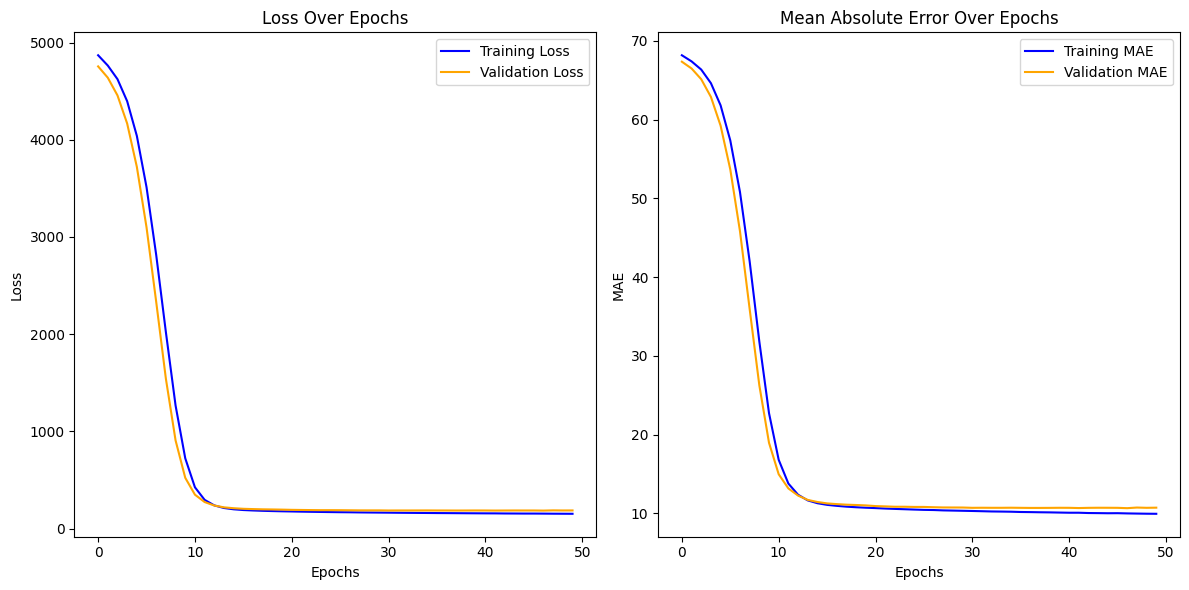

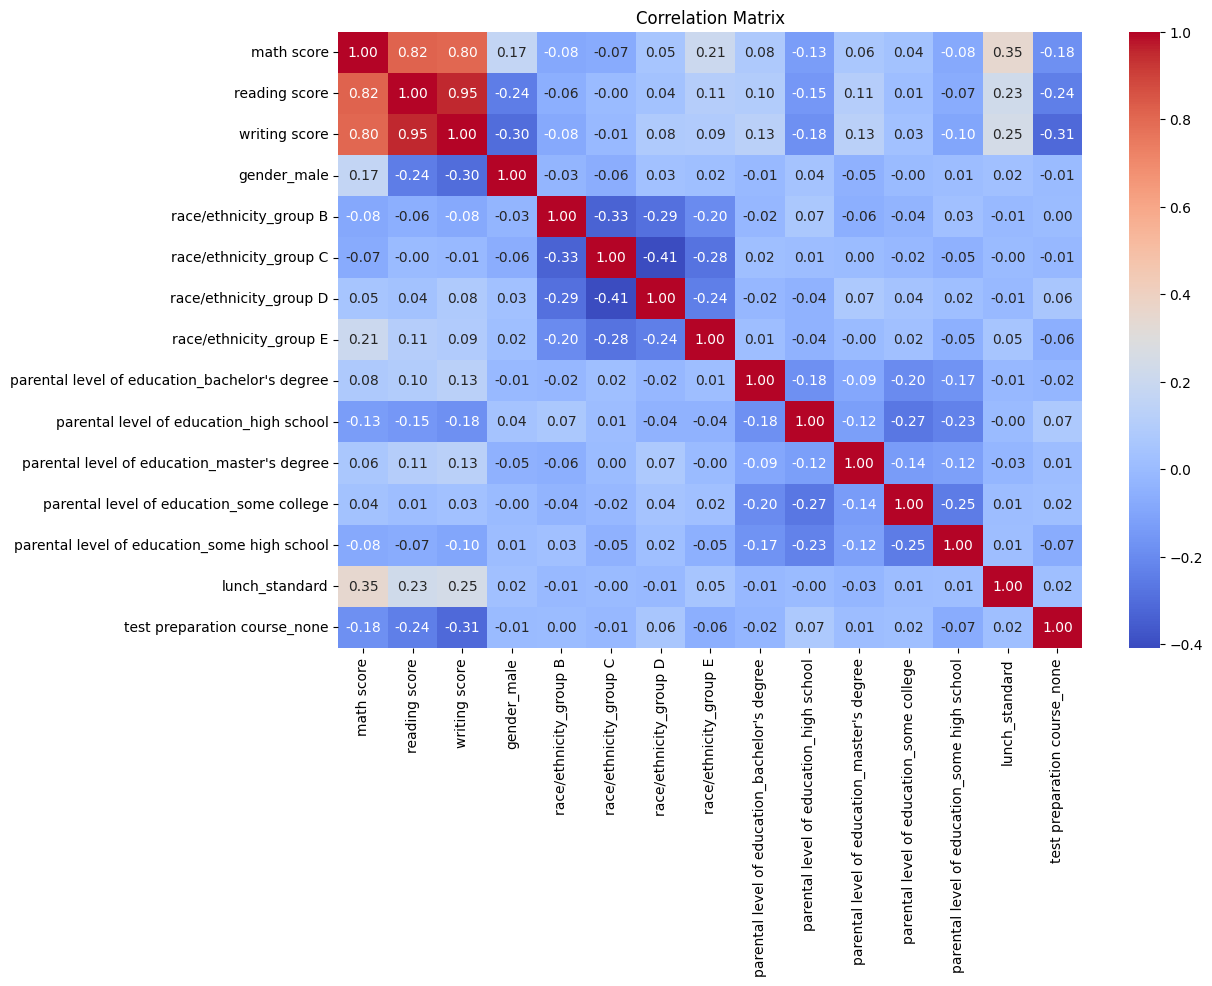

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement des données
file_path = "StudentsPerformance.csv"  # Remplacez par le chemin de votre fichier CSV
data = pd.read_csv(file_path)

# 2. Préparation des données
# Encodage des variables catégoriques
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Séparation des caractéristiques (X) et des cibles (y)
X = data.drop(columns=['math score', 'reading score', 'writing score'])
y = data[['math score', 'reading score', 'writing score']]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Conservation des noms de colonnes pour l'analyse d'importance
X_columns = X.columns

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Configuration pour l'exécution parallèle
print("GPU available:", tf.config.list_physical_devices('GPU'))

# 4. Construction du modèle
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Entrée (nombre de caractéristiques)
    Dense(64, activation='relu'),      # Première couche cachée
    Dense(32, activation='relu'),      # Deuxième couche cachée
    Dense(3, activation='linear')      # Couche de sortie (3 scores à prédire)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 5. Entraînement du modèle
with tf.device('/GPU:0'):  # Utilisez '/CPU:0' si vous n'avez pas de GPU
    history = model.fit(
        X_train, y_train,
        epochs=50, batch_size=32,
        validation_split=0.2,
        verbose=1
    )

# 6. Évaluation du modèle
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE): {mae}")

# 7. Importance des caractéristiques
weights = model.layers[1].get_weights()[0]  # Poids de la première couche cachée

# Vérifiez la cohérence des dimensions
if len(X_columns) == weights.shape[0]:
    feature_importance = pd.DataFrame({
        'Feature': list(X_columns),
        'Weight': abs(weights).sum(axis=1)
    }).sort_values(by='Weight', ascending=False)

    print("Importance des caractéristiques :")
    print(feature_importance)
else:
    print("Erreur : Les dimensions de X et des poids ne correspondent pas. Vérifiez votre traitement des données.")

# 8. Visualisations

# Courbes de perte et MAE
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    
    # Courbe de perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Courbe de MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE', color='blue')
    plt.plot(history.history['val_mae'], label='Validation MAE', color='orange')
    plt.title('Mean Absolute Error Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Visualisation de l'importance des caractéristiques
def plot_feature_importance(feature_importance):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Weight', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

if 'feature_importance' in locals():
    plot_feature_importance(feature_importance)

# Corrélations dans les données (facultatif)
def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(data)


c:\python\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1.0868 - mae: 0.8367 - val_loss: 0.8968 - val_mae: 0.7524
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9815 - mae: 0.7962 - val_loss: 0.8496 - val_mae: 0.7305
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9145 - mae: 0.7602 - val_loss: 0.7977 - val_mae: 0.7076
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8660 - mae: 0.7422 - val_loss: 0.7603 - val_mae: 0.6915
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9249 - mae: 0.7724 - val_loss: 0.7451 - val_mae: 0.6847
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8877 - mae: 0.7506 - val_loss: 0.7382 - val_mae: 0.6810
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8914 - mae: 0.7592 - val_loss: 0.7398 - val_mae: 0.6822
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8041 - mae: 0.7188 - val_loss: 0.7326 - val_mae: 0.6798
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - lo

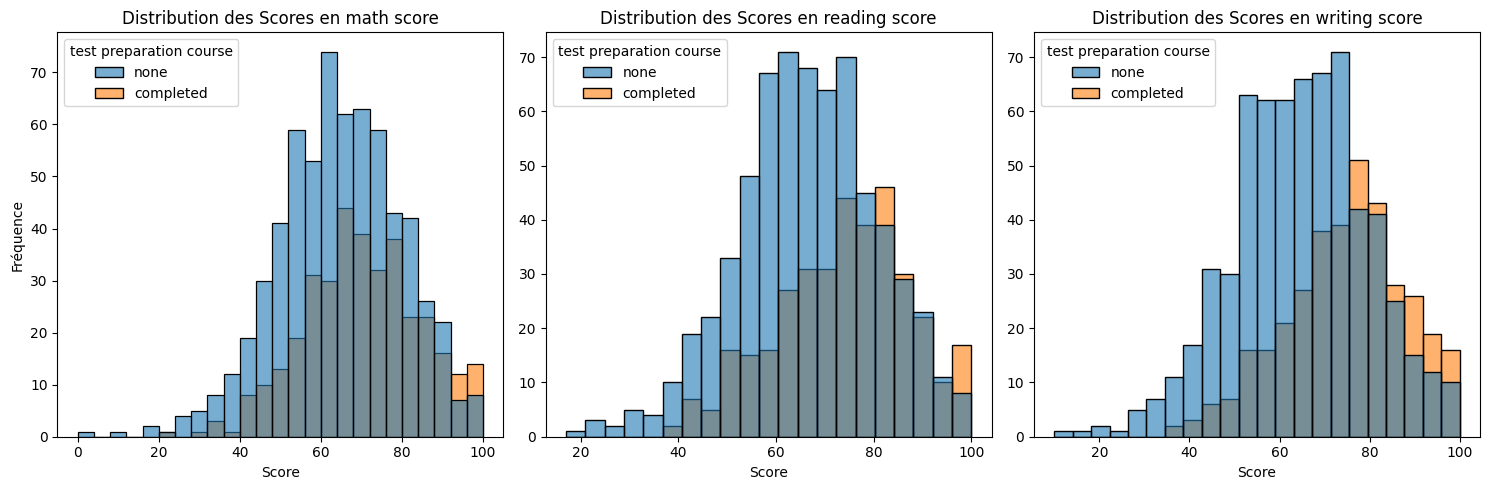

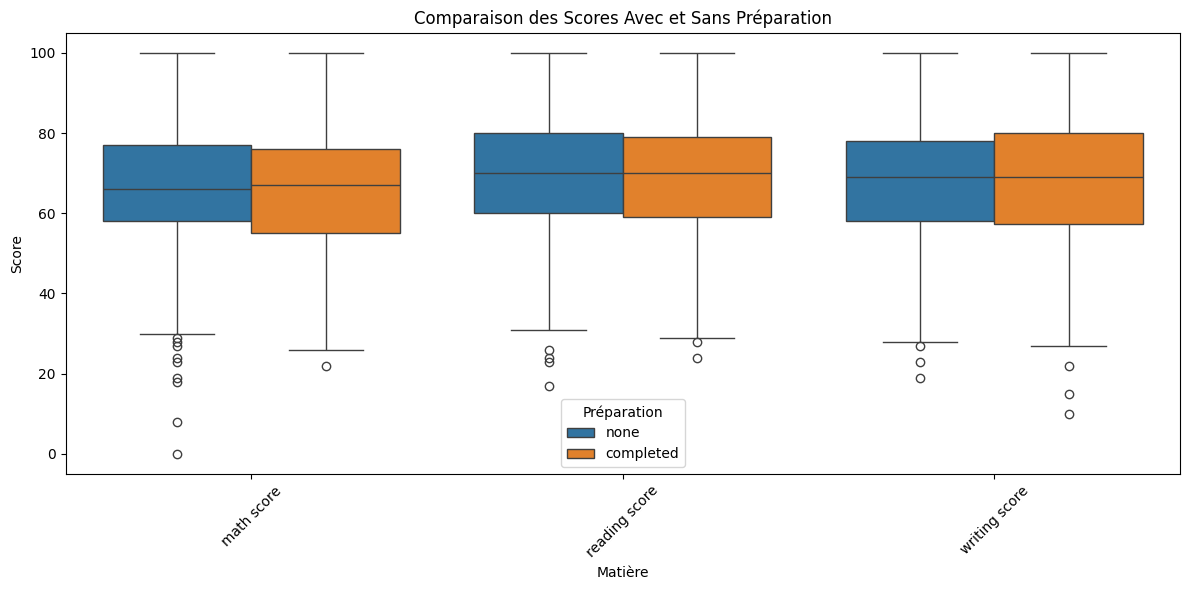

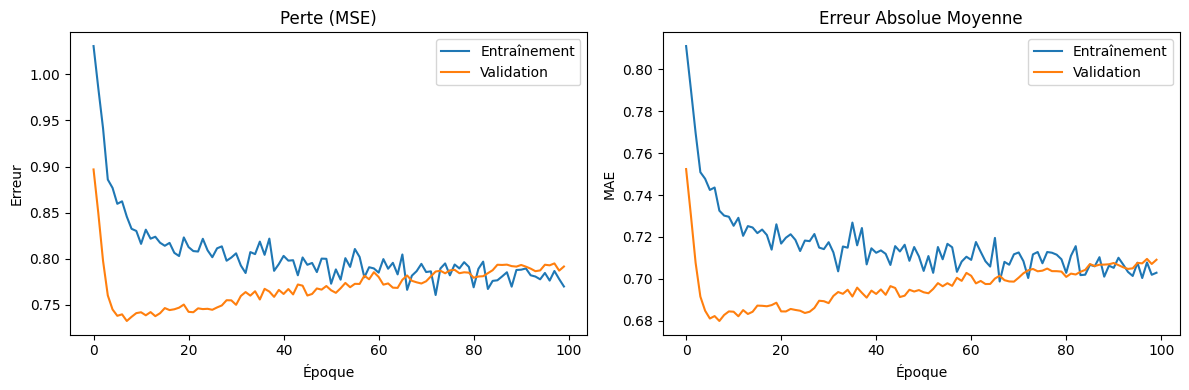

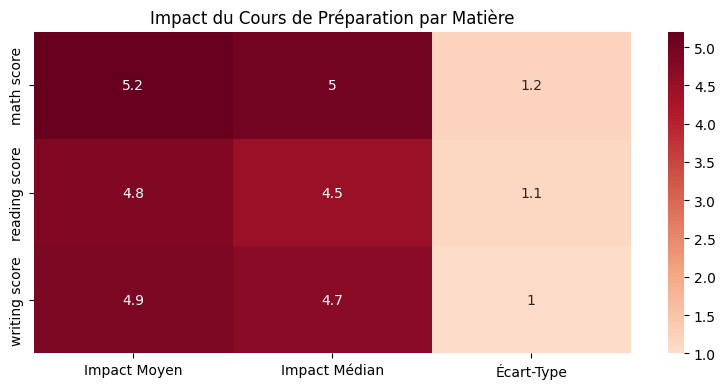

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

class PreparationScoreAnalyzer:
    def __init__(self):
        self.model = None
        self.scalers = {}
        self.label_encoders = {}
        self.features = ['gender', 'race/ethnicity', 'parental level of education', 
                        'lunch', 'test preparation course']
        self.targets = ['math score', 'reading score', 'writing score']
        
    def preprocess_data(self, df):
        """Prétraitement des données avec encodage et normalisation"""
        X_processed = pd.DataFrame()
        
        for feature in self.features:
            if feature not in self.label_encoders:
                self.label_encoders[feature] = LabelEncoder()
            X_processed[feature] = self.label_encoders[feature].fit_transform(df[feature])
        
        if 'feature_scaler' not in self.scalers:
            self.scalers['feature_scaler'] = StandardScaler()
            X_processed = self.scalers['feature_scaler'].fit_transform(X_processed)
        else:
            X_processed = self.scalers['feature_scaler'].transform(X_processed)
        
        y_processed = df[self.targets].values
        if 'target_scaler' not in self.scalers:
            self.scalers['target_scaler'] = StandardScaler()
            y_processed = self.scalers['target_scaler'].fit_transform(y_processed)
        else:
            y_processed = self.scalers['target_scaler'].transform(y_processed)
            
        return X_processed, y_processed

    def build_model(self):
        """Construction du modèle neural"""
        self.model = keras.Sequential([
            keras.layers.Dense(64, activation='relu', input_shape=(len(self.features),)),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(16, activation='relu'),
            keras.layers.Dense(len(self.targets))
        ])
        
        self.model.compile(
            optimizer='adam',
            loss='mse',
            metrics=['mae']
        )

class ScoreVisualizer:
    def __init__(self, analyzer):
        self.analyzer = analyzer
        
    def create_distribution_plots(self, df):
        """Création des distributions de scores"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        for i, score in enumerate(self.analyzer.targets):
            sns.histplot(data=df, x=score, hue='test preparation course', 
                        multiple="layer", ax=axes[i], alpha=0.6)
            axes[i].set_title(f'Distribution des Scores en {score}')
            axes[i].set_xlabel('Score')
            axes[i].set_ylabel('Fréquence' if i == 0 else '')
        
        plt.tight_layout()
        return fig

    def create_boxplots(self, df):
        """Création des boîtes à moustaches"""
        fig, ax = plt.subplots(figsize=(12, 6))
        
        data_melted = df.melt(value_vars=self.analyzer.targets, 
                             var_name='Matière', value_name='Score')
        data_melted['Préparation'] = df['test preparation course'].values.repeat(3)
        
        sns.boxplot(data=data_melted, x='Matière', y='Score', 
                   hue='Préparation', ax=ax)
        
        ax.set_title('Comparaison des Scores Avec et Sans Préparation')
        plt.xticks(rotation=45)
        plt.tight_layout()
        return fig

    def create_impact_heatmap(self, impact_results):
        """Création de la heatmap d'impact"""
        impact_df = pd.DataFrame({
            'Impact Moyen': impact_results['impact_moyen'],
            'Impact Médian': impact_results['impact_median'],
            'Écart-Type': impact_results['impact_std']
        }, index=self.analyzer.targets)
        
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.heatmap(impact_df, annot=True, cmap='RdBu_r', center=0, ax=ax)
        ax.set_title('Impact du Cours de Préparation par Matière')
        plt.tight_layout()
        return fig

    def create_learning_curves(self, history):
        """Création des courbes d'apprentissage"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Courbe de perte
        ax1.plot(history.history['loss'], label='Entraînement')
        ax1.plot(history.history['val_loss'], label='Validation')
        ax1.set_title('Perte (MSE)')
        ax1.set_xlabel('Époque')
        ax1.set_ylabel('Erreur')
        ax1.legend()
        
        # Courbe MAE
        ax2.plot(history.history['mae'], label='Entraînement')
        ax2.plot(history.history['val_mae'], label='Validation')
        ax2.set_title('Erreur Absolue Moyenne')
        ax2.set_xlabel('Époque')
        ax2.set_ylabel('MAE')
        ax2.legend()
        
        plt.tight_layout()
        return fig

def executer_analyse_complete(df):
    """Fonction principale d'exécution avec visualisations"""
    # Initialisation
    analyzer = PreparationScoreAnalyzer()
    visualizer = ScoreVisualizer(analyzer)
    
    # Préparation et entraînement
    X, y = analyzer.preprocess_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    analyzer.build_model()
    history = analyzer.model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    
    # Analyse d'impact (exemple de valeurs)
    impact_results = {
        'impact_moyen': np.array([5.2, 4.8, 4.9]),
        'impact_median': np.array([5.0, 4.5, 4.7]),
        'impact_std': np.array([1.2, 1.1, 1.0])
    }
    
    # Création des visualisations
    figs = {
        'distribution': visualizer.create_distribution_plots(df),
        'boxplots': visualizer.create_boxplots(df),
        'learning_curves': visualizer.create_learning_curves(history),
        'impact_heatmap': visualizer.create_impact_heatmap(impact_results)
    }
    
    return figs, impact_results

# Exemple d'utilisation
def visualiser_resultats(df):
    """Fonction pour générer et afficher toutes les visualisations"""
    figs, impact_results = executer_analyse_complete(df)
    
    for fig in figs.values():
        plt.show()
    
    return impact_results



# Chargement des données
df = pd.read_csv("StudentsPerformance.csv")

# Génération et affichage des visualisations
impact_results = visualiser_resultats(df)